<a href="https://colab.research.google.com/github/SharmaAshwini/UNT/blob/main/Methods%20in%20Empirical%20Analysis/Exercise_6_SimpleLinReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**ICE-6**: Simple Linear Regression

###**INSTRUCTIONS**
#####Provide your observation/summary for all tutorials and tasks. Marks will be deducted for those who dont write the summary.
#####Print this file as pdf and submit both pdf and .ipynb file(No screenshots). Not submitting any of these files will impact their grades.


###Tutorial

###1.Importing the required libraries

In [ ]:
!gdown '1TNEvLrpuIketCcTdXC_kBP75op6dgl5X'

Downloading...
From: https://drive.google.com/uc?id=1TNEvLrpuIketCcTdXC_kBP75op6dgl5X
To: /content/Company_data.csv
100% 4.06k/4.06k [00:00<00:00, 13.1MB/s]


In [ ]:
# Importing naumpy and pandas libraries to read the data

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package
import numpy as np
import pandas as pd

# Read the given CSV file, and view some sample records
advertising = pd.read_csv("Company_data.csv")
advertising

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


###2. Understanding the data

In [ ]:
# Shape of our dataset
print(advertising.shape)

# Info our dataset
advertising.info()

# Describe our dataset
advertising.describe()

(200, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


###3. Visualizing the data
####Scatter Plot

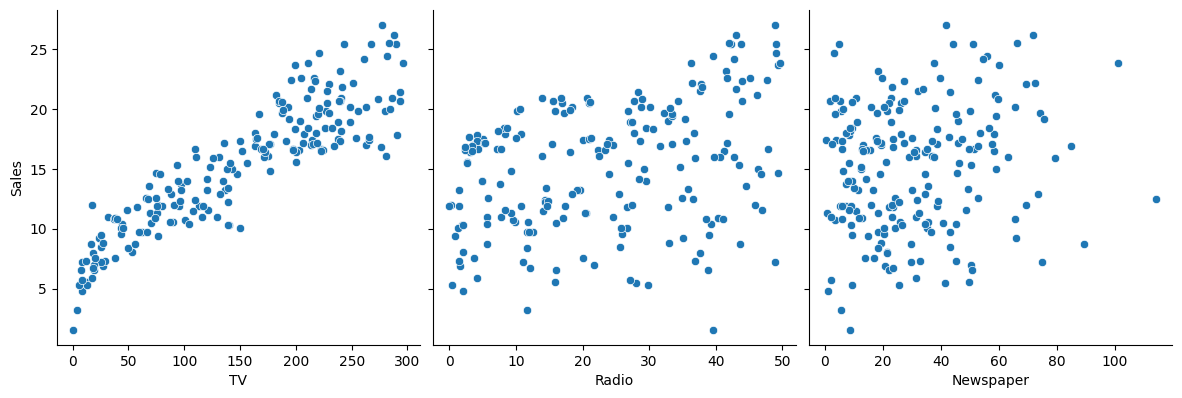

In [ ]:
# Import matplotlib and seaborn libraries to visualize the data
import matplotlib.pyplot as plt
import seaborn as sns

# Using pairplot we'll visualize the data for correlation
sns.pairplot(advertising, x_vars=['TV', 'Radio','Newspaper'],
             y_vars='Sales', size=4, aspect=1, kind='scatter')
plt.show()

####HeatMap

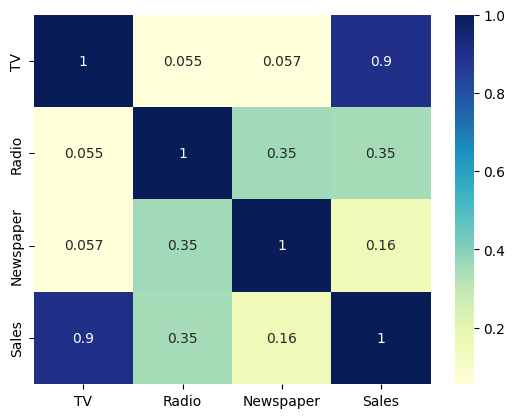

In [ ]:
# Visualizing the data using heatmap
sns.heatmap(advertising.corr(), cmap="YlGnBu", annot = True)
plt.show()

####4.Performing Simple Linear Regression

In [ ]:
# Creating X and y
X = advertising['TV']
y = advertising['Sales']

####5. Create Train and Test sets

In [ ]:
# Splitting the varaibles as training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7,
                                                    test_size = 0.3, random_state = 100)

####Training dataset

In [ ]:
# Take a look at the train dataset
X_train
y_train

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
       ... 
87     16.0
103    19.7
67     13.4
24      9.7
8       4.8
Name: Sales, Length: 140, dtype: float64

####6. Building and training the model

In [ ]:
# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

In [ ]:
# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [ ]:
# Performing a summary to list out all the different parameters of the regression line fitted
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sun, 15 Oct 2023   Prob (F-statistic):           1.52e-52
Time:                        20:25:43   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

####7.Bestfit Regression Line

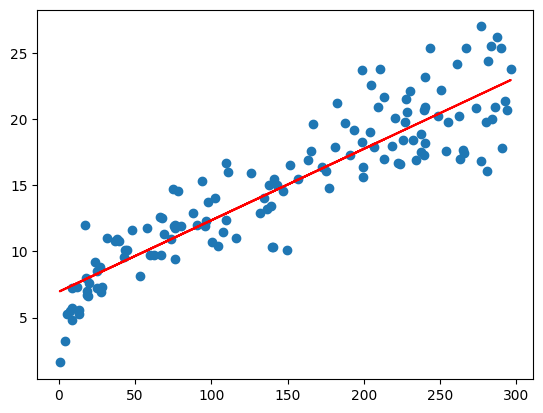

In [ ]:
# Visualizing the regression line
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

####8. Residual Analysis

In [ ]:
# Predicting y_value using traingn data of X
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

####Histogram

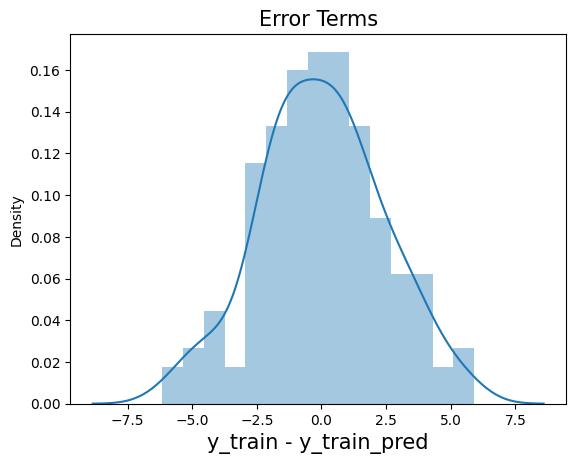

In [ ]:
# Plotting the histogram using the residual values
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

####Scatter Plot

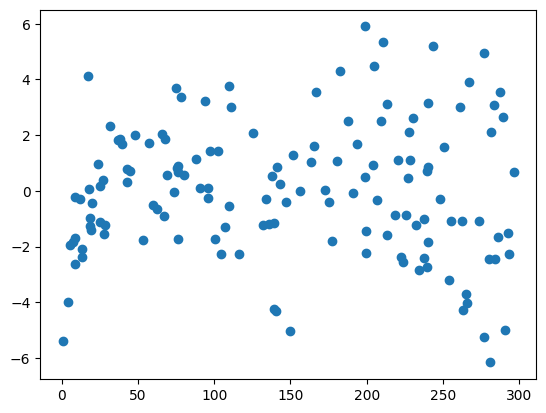

In [ ]:
# Looking for any patterns in the residuals
plt.scatter(X_train,res)
plt.show()

####9. Predictions on the Test data or Evaluating the model

In [ ]:
# Adding a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predicting the y values corresponding to X_test_sm
y_test_pred = lr.predict(X_test_sm)

# Printing the first 15 predicted values
y_test_pred

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
167    18.228745
116    14.541452
96     17.726924
52     18.752384
69     18.774202
164    13.341445
124    19.466933
182    10.014155
154    17.192376
125    11.705073
196    12.086893
194    15.114182
177    16.232370
163    15.866914
31     13.106899
11     18.659656
73     14.006904
15     17.606923
41     16.603281
97     17.034193
128    18.965113
133    18.937840
82     11.055978
139    17.034193
123    13.663265
83     10.679613
65     10.712340
151    13.548719
162    17.225103
170     9.675971
77     13.521446
32     12.250530
173    16.134188
174    19.079659
85     17.486923
168    18.697838
112    16.532372
171    15.921460
181    18.866930
7      13.505083
46     11.841437
75      7.870506
28     20.519667
29     10.799613
195     9.032331
40     17.994198
153    16.292371
115    11.045069
64     14.099631
59     18.441473
1       9.375969
192     7.886870
136     8.345054
152    17.7269

In [ ]:
# Importing r2_square
from sklearn.metrics import r2_score

# Checking the R-squared value
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.792103160124566

####10. visualizing the line on test data

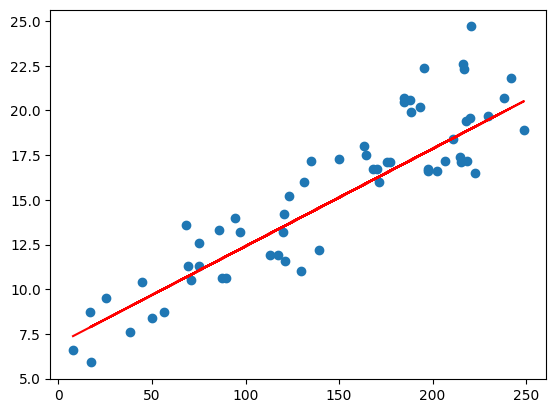

In [ ]:
# Visualize the line on the test set
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

In [ ]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size = 0.7,
                                                                test_size = 0.3, random_state = 100)

In [ ]:
# Shape of the train set without adding column
print(X_train_lm.shape)

# Adding additional column to the train and test data
X_train_lm = X_train_lm.values.reshape(-1,1)
X_test_lm = X_test_lm.values.reshape(-1,1)

print(X_train_lm.shape)
print(X_test_lm.shape)

(140,)
(140, 1)
(60, 1)


In [ ]:
from sklearn.linear_model import LinearRegression

# Creating an object of Linear Regression
lm = LinearRegression()

# Fit the model using .fit() method
lm.fit(X_train_lm, y_train_lm)

LinearRegression()

####11. Calculating intercept and slope values

In [ ]:
# Intercept value
print("Intercept :",lm.intercept_)

# Slope value
print('Slope :',lm.coef_)

Intercept : 6.948683200001357
Slope : [0.05454575]


####12. Evaluating the model

In [ ]:
# Making Predictions of y_value
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

# Comparing the r2 value of both train and test data
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.8157933136480389
0.7921031601245662


#Write the observations of the above tutorial here**(10%)**

**Observations:**

In this exercise, we have touched upon the statistical concept of Linear Regression where we tried to find relation between parameters and also introduced the concept of dependent and independent variables.

We started with an advertising dataset and explored basic information with info and describe commands. Correlation between fields and with sales parameters was well explained with the visuals using scatterplot and heatmap.

Followed by train and test split of this data with simple linear regression.

We used 2 different models, OLS from statsmodels and LinearRegression from sklearn.

In the first approach, we used statsmodels Ordinary Least Square of OLS model to fit and get constant & slope values. OLS uses a sum of square error method to find the best fit by minimizing the error. After generating the coefficient and constant values, the projected regression line on scatterplot shows the linear relation between data points. As residual plays a significant role, conclude OLS with residual analysis using scatterplot and heatmap. Finally, predicted some samples with learned parameters and checked accuracy using the R2 metric.

In the second approach, I performed another set of similar exercises using sklearn's LinearRegression model calculating fit, predict and r2_score in just a few lines.
The results of intercept and slope values are similar as the underlying principle is the same.





#Task 1:
Perform linear regression on the tutorial given using the dataset attached.After you are successful in executing and fixing the issues with the current version, use dataset of your choice and execute it again.**(30%)**

In [ ]:
!gdown '1B2sXsO0cFnmy48G2RuA1Qh74Sb1B0WT4'

Downloading...
From: https://drive.google.com/uc?id=1B2sXsO0cFnmy48G2RuA1Qh74Sb1B0WT4
To: /content/sales_profit_dataset.xlsx
100% 24.9k/24.9k [00:00<00:00, 45.6MB/s]


In [ ]:
sales_profit = pd.read_excel("sales_profit_dataset.xlsx")
sales_profit

,Sales,Profit
0,299.52,149.7600
1,232.96,116.4800
2,198.46,99.2300
3,198.46,99.2300
4,196.21,98.1050
...,...,...
1216,90.48,23.5248
1217,88.04,22.8904
1218,80.88,21.0288
1219,80.30,20.8780


In [ ]:
# Shape of our dataset
print(sales_profit.shape)

# Info our dataset
sales_profit.info()

# Describe our dataset
sales_profit.describe()

(1221, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1221 entries, 0 to 1220
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   1221 non-null   float64
 1   Profit  1221 non-null   float64
dtypes: float64(2)
memory usage: 19.2 KB


,Sales,Profit
count,1221.000000,1221.000000
mean,145.323617,53.030796
std,62.983105,25.384375
min,70.008000,18.447000
25%,91.600000,33.726600
50%,125.930000,46.575000
75%,186.690000,68.976000
max,299.990000,149.760000


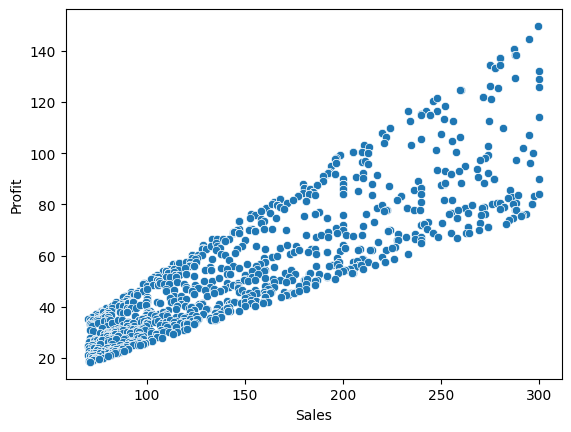

In [ ]:
# Using pairplot we'll visualize the data for correlation
sns.scatterplot(sales_profit, x='Sales', y='Profit')
plt.show()

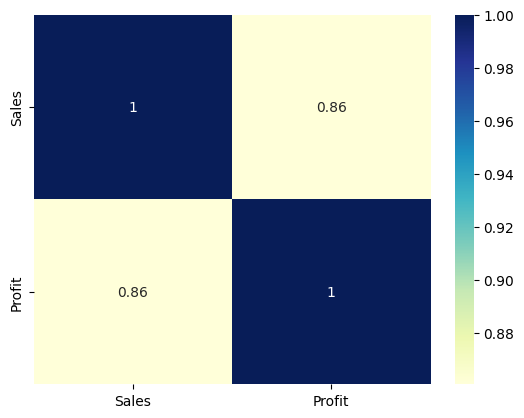

In [ ]:
# Visualizing the data using heatmap
sns.heatmap(sales_profit.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [ ]:
# Creating X and y
X = sales_profit['Sales']
y = sales_profit['Profit']

In [ ]:
y

0       149.7600
1       116.4800
2        99.2300
3        99.2300
4        98.1050
          ...   
1216     23.5248
1217     22.8904
1218     21.0288
1219     20.8780
1220     72.3580
Name: Profit, Length: 1221, dtype: float64

In [ ]:
# Splitting the varaibles as training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7,
                                                    test_size = 0.3, random_state = 100)

In [ ]:
# Take a look at the train dataset
print(f'{X_train}\n\n')
print(y_train)

830    254.900
517    124.032
500     79.872
551    254.970
654     76.864
        ...   
802    173.488
53     122.970
350    119.960
79     111.960
792     99.136
Name: Sales, Length: 854, dtype: float64


830    76.4700
517    44.9616
500    29.9520
551    91.7892
654    26.9024
        ...   
802    54.2150
53     60.2553
350    52.7824
79     54.8604
792    30.9800
Name: Profit, Length: 854, dtype: float64


In [ ]:
# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

In [ ]:
# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

const    2.340182
Sales    0.348289
dtype: float64

In [ ]:
# Performing a summary to list out all the different parameters of the regression line fitted
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     2374.
Date:                Sun, 15 Oct 2023   Prob (F-statistic):          1.42e-248
Time:                        20:27:19   Log-Likelihood:                -3412.2
No. Observations:                 854   AIC:                             6828.
Df Residuals:                     852   BIC:                             6838.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3402      1.152      2.032      0.042       0.080       4.601
Sales          0.3483      0.007     48.729      0.000       0.334       0.362
==============================================================================
Omnibus:                       34.013   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.488
Skew:                           0.511   Prob(JB):                     7.24e-09
Kurtosis:                       2.912   Cond. No.                         412.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

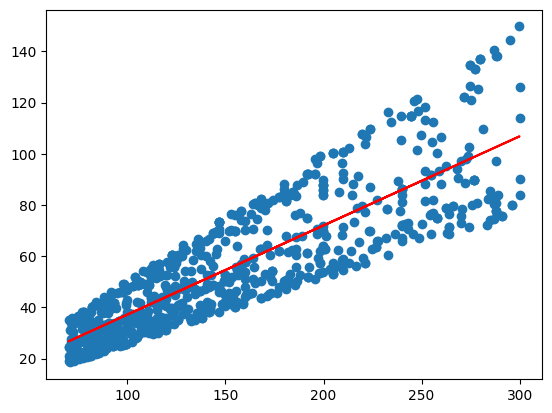

In [ ]:
# Visualizing the regression line
plt.scatter(X_train, y_train)
plt.plot(X_train, 2.3402 + 0.3483*X_train, 'r')
plt.show()

In [ ]:
# Predicting y_value using traingn data of X
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

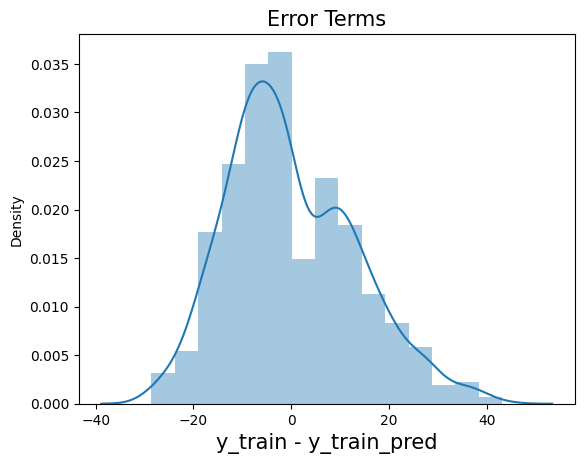

In [ ]:
# Plotting the histogram using the residual values
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

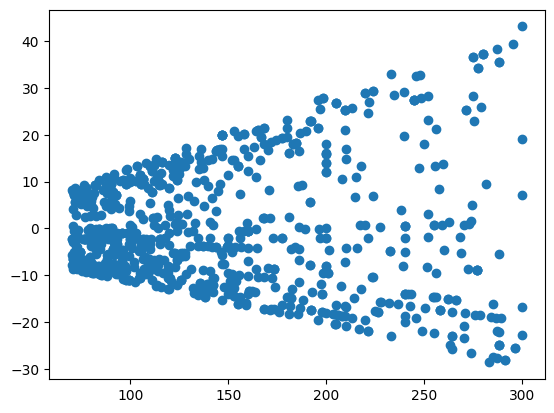

In [ ]:
# Looking for any patterns in the residuals
plt.scatter(X_train,res)
plt.show()

In [ ]:
# Adding a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predicting the y values corresponding to X_test_sm
y_test_pred = lr.predict(X_test_sm)

# Printing the first 15 predicted values
y_test_pred

592     89.983638
689     97.735159
353     29.558971
631     36.110288
973     42.376008
          ...    
1088    72.360212
221     32.279108
450     41.961544
542     34.739422
493     29.612608
Length: 367, dtype: float64

In [ ]:
# Importing r2_square
from sklearn.metrics import r2_score

# Checking the R-squared value
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.7487030570270412

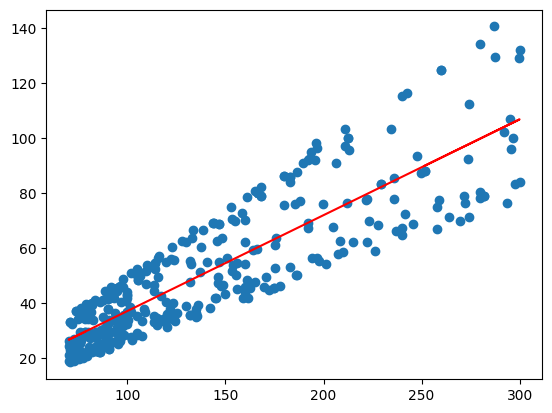

In [ ]:
# Visualize the line on the test set
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

In [ ]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size = 0.7,
                                                                test_size = 0.3, random_state = 100)

In [ ]:
# Shape of the train set without adding column
print(X_train_lm.shape)

# Adding additional column to the train and test data
X_train_lm = X_train_lm.values.reshape(-1,1)
X_test_lm = X_test_lm.values.reshape(-1,1)

print(X_train_lm.shape)
print(X_test_lm.shape)

(854,)
(854, 1)
(367, 1)


In [ ]:
from sklearn.linear_model import LinearRegression

# Creating an object of Linear Regression
lm = LinearRegression()

# Fit the model using .fit() method
lm.fit(X_train_lm, y_train_lm)

LinearRegression()

In [ ]:
# Intercept value
print("Intercept :",lm.intercept_)

# Slope value
print('Slope :',lm.coef_)

Intercept : 2.3401821018481925
Slope : [0.34828905]


In [ ]:
# Making Predictions of y_value
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

# Comparing the r2 value of both train and test data
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.7359346508637872
0.7487030570270412


#Task 2:
###Question 2a:
Write the applications of Linear Regression.**(10%)**

**Answer:**

Linear regression finds a relation between dependent and independent variables provided in data, which results in the slope of the equation. This relation can be further used in forecasting, for given independent variables it can predict the value of the dependent variable.

There are numerous applications which are using linear regression, some of which we have used in in-class tasks till now, for example:

Crop yield: predicting future yields based on certain variables

Real estate: predicting house price based on variables like square yards or #bathrooms, #bedrooms etc.

Other than above, we have talked about sports performance where we tried to analyze the performance of a player.
At multiple occurrences, I have used sales prediction examples where I tried to find relation between segments or categories with sales price.

Customer churn is something being used heavily in all industries, like telecom where average revenue per user (ARPU) is important hence, each customer is bringing value. Prediction of churn can help in avoiding that churn.

Employee iteration can also be avoided if it can be predicted beforehand.



###Question 2b:
What are the basic assumptions and disadvantages of the linear regression algorithm.**(10%)**

**Answer:**

**Assumptions:**

The most common one is, presence of independent and dependent variables. Linear relation between parameters must exist for linear regression.

Some assumptions w.r.t. residuals we have checked in current exercise, like dependency, spread and distribution of residual which we checked using scatter plot and histogram.

As linear regression tries to understand the relation between independent and dependent variables, if independent variables are correlated to each other with different values of dependent variables, finding this relation becomes really challenging. Hence, less correlation between independent parameters.


**Disadvantages:**

The most common problem or biggest disadvantage is: sensitivity to outliers or extreme values present in dataset, which makes it extremely tough to find the relation or slope between variables.

As the name suggests, linear regression, if the dataset has non-linear relation, then it will generate a poor outcome.

Some other issues observed in exercises are,
data points must be numeric,
the relation must be linear with less complexity,
and on top, the mentioned assumptions must be followed.


#Task 3:
####Question 3(a):
Given the data of individuals and their healthcare charges billed by their insurance provider.Here, "charges" will be the dependent variable and all the other variables are independent variables.Create another feature based called BMI_group which groups people based on their BMI. The groups should be as follows:**(20%)**

#####Underweight: BMI is less than 18.5.
#####Normal: BMI is 18.5 to 24.9.
#####Overweight: BMI is 25 to 29.9.
#####Obese: BMI is 30 or more.

In [ ]:
#Write your code here.

In [ ]:
!gdown '1QEUCEhRfqUZQA8Au0DKpKM4mR9Jiwp_p'

Downloading...
From: https://drive.google.com/uc?id=1QEUCEhRfqUZQA8Au0DKpKM4mR9Jiwp_p
To: /content/insurance.csv
100% 55.6k/55.6k [00:00<00:00, 68.7MB/s]


In [ ]:
insurance = pd.read_csv("insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
col         = 'bmi'
conditions  = [ insurance[col]<18.5, (insurance[col]>=18.5) & (insurance[col]<25), (insurance[col]>=25) & (insurance[col]<30), insurance[col]>=30 ]
choices     = [ "Underweight", 'Normal', 'Overweight', 'Obese' ]

In [ ]:
insurance['BMI_group'] = np.select(conditions, choices, default=np.nan)

In [ ]:
insurance[(insurance['bmi']>=25) & (insurance['bmi']<30)]

,age,sex,bmi,children,smoker,region,charges,BMI_group
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight
4,32,male,28.880,0,no,northwest,3866.85520,Overweight
5,31,female,25.740,0,no,southeast,3756.62160,Overweight
7,37,female,27.740,3,no,northwest,7281.50560,Overweight
8,37,male,29.830,2,no,northeast,6406.41070,Overweight
...,...,...,...,...,...,...,...,...
1321,62,male,26.695,0,yes,northeast,28101.33305,Overweight
1324,31,male,25.935,1,no,northwest,4239.89265,Overweight
1330,57,female,25.740,2,no,southeast,12629.16560,Overweight
1336,21,female,25.800,0,no,southwest,2007.94500,Overweight


####Question 3(b):
Encode all categorical features such that they can be used in a regression model. i.e.sex, BMI_group, smoker and region should be labelled properly. Use the label encoder for all features.**(20%)**

In [ ]:
#Write your code here

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()


In [ ]:
le.fit(insurance['sex'])
insurance['sex_enc'] = le.transform(insurance['sex'])

print(f'all values for gender: {list(le.classes_)}')

print(f'inverse of value 0: {list(le.inverse_transform([0]))}')

all values for gender: ['female', 'male']
inverse of value 0: ['female']


In [ ]:
LabelEncoder()
le.fit(insurance['smoker'])
insurance['smoker_enc'] = le.transform(insurance['smoker'])

print(f'all values for smoker: {list(le.classes_)}')

print(f'inverse of value 1: {list(le.inverse_transform([1]))}')

all values for smoker: ['no', 'yes']
inverse of value 1: ['yes']


In [ ]:
LabelEncoder()
le.fit(insurance['region'])
insurance['region_enc'] = le.transform(insurance['region'])

print(f'all values for region: {list(le.classes_)}')

print(f'inverse of value 3: {list(le.inverse_transform([3]))}')

all values for region: ['northeast', 'northwest', 'southeast', 'southwest']
inverse of value 3: ['southwest']


In [ ]:
LabelEncoder()
le.fit(insurance['BMI_group'])
insurance['BMI_group_enc'] = le.transform(insurance['BMI_group'])

print(f'all values for BMI Group: {list(le.classes_)}')

print(f'inverse of value 3: {list(le.inverse_transform([3]))}')

all values for BMI Group: ['Normal', 'Obese', 'Overweight', 'Underweight']
inverse of value 3: ['Underweight']


In [ ]:
insurance

,age,sex,bmi,children,smoker,region,charges,BMI_group,sex_enc,smoker_enc,region_enc,BMI_group_enc
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight,0,1,3,2
1,18,male,33.770,1,no,southeast,1725.55230,Obese,1,0,2,1
2,28,male,33.000,3,no,southeast,4449.46200,Obese,1,0,2,1
3,33,male,22.705,0,no,northwest,21984.47061,Normal,1,0,1,0
4,32,male,28.880,0,no,northwest,3866.85520,Overweight,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Obese,1,0,1,1
1334,18,female,31.920,0,no,northeast,2205.98080,Obese,0,0,0,1
1335,18,female,36.850,0,no,southeast,1629.83350,Obese,0,0,2,1
1336,21,female,25.800,0,no,southwest,2007.94500,Overweight,0,0,3,2


In [ ]:
# Shape of our dataset
print(insurance.shape)

# Info our dataset
insurance.info()

# Describe our dataset
insurance.describe()

(1338, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1338 non-null   int64  
 1   sex            1338 non-null   object 
 2   bmi            1338 non-null   float64
 3   children       1338 non-null   int64  
 4   smoker         1338 non-null   object 
 5   region         1338 non-null   object 
 6   charges        1338 non-null   float64
 7   BMI_group      1338 non-null   object 
 8   sex_enc        1338 non-null   int64  
 9   smoker_enc     1338 non-null   int64  
 10  region_enc     1338 non-null   int64  
 11  BMI_group_enc  1338 non-null   int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 125.6+ KB


,age,bmi,children,charges,sex_enc,smoker_enc,region_enc,BMI_group_enc
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.505232,0.204783,1.515695,1.150224
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.403694,1.104885,0.703025
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000,1.000000,1.000000
50%,39.000000,30.400000,1.000000,9382.033000,1.000000,0.000000,2.000000,1.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,0.000000,2.000000,2.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,3.000000,3.000000
